In [286]:
import argparse
import arrow
import codecs
import datetime
import ics
import itertools
import pyparsing as pp
import re
import os
from collections import defaultdict
import io
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

import calendar
%matplotlib inline


def _group(s, groups):
    """Group a string using regex groups.
  
    Args:
        s: the string to group
        groups: a list of tuples of (regex pattern, replacement string)
    Returns:
        the group for the string
    """
    for pattern, replacement in groups:
        if pattern.match(s):
            return replacement
    return s


def _total_hours(seconds):
    """Converts seconds to hours.
  
    Args:
        seconds: the total seconds
    Returns:
        the total hours as a float
    """
    return seconds / 3600.0


def _process_calendar(calendar_file):
    """Processes a calendar, grouping events by name.
  
    Args:
        calendar_file: the ics calendar file
        start_date: the starting date, or None
        end_date: the end date, or None
        allday: if true, includes all day events in processing
        grouping_regex_strs: regular expressions for grouping patterns
    """
    print("Calendar file name", calendar_file)
    print("File type", calendar_file)
    calendar = ics.Calendar(open(calendar_file).read())
    cal_df = pd.DataFrame(columns=['day','month','year','hour','event_name','duration'])
    groups = defaultdict(lambda: 0)
    total_seconds = 0
    i=0
    for event in calendar.events:

        start_date = arrow.get(event.begin)
        end_date =  arrow.get(event.end)
        cal_df.loc[i] = [start_date.datetime.day,start_date.datetime.month,start_date.datetime.year,
                         start_date.datetime.hour,
                         event.name,event.duration.total_seconds()]
        i+=1
    return cal_df


def _valid_date(s):
    """Validates and converts a date as arrow-compatible.
  
    Args:
        s: the string argument
    Returns:
        an arrow date
    Raises:
        ArgumentTypeError: if the date is invalid
    """
    try:
        return arrow.get(s)
    except TypeError:
        msg = "Not a valid date: '{0}'.".format(s)
        raise argparse.ArgumentTypeError(msg)


def plot(x,y,z, xlabel, ylabel, title, fig_size, fig_color, flag):

    try:
        fig,ax= plt.subplots(nrows=1)
        ax.bar(z[0:5],y[0:5], color = fig_color)
        ax.set_title(title)
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)

        if flag == '-T' or flag == '-L':
            plt.xticks(z[0:5], x[0:5])

        fig.set_size_inches(fig_size)
        return fig
    except:
        return "Can't generate plot"
    
def plot_tweetDate(x,y,x_column, y_column,xlabel, ylabel, title, fig_size, fig_color):
    fig,ax= plt.subplots(nrows=1)
    ax.bar(x[x_column],x[y_column], color = fig_color)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.xticks(x[x_column], y)
    fig.set_size_inches(fig_size)
    return fig




Calendar file name shsher@uw.edu.ics
File type shsher@uw.edu.ics


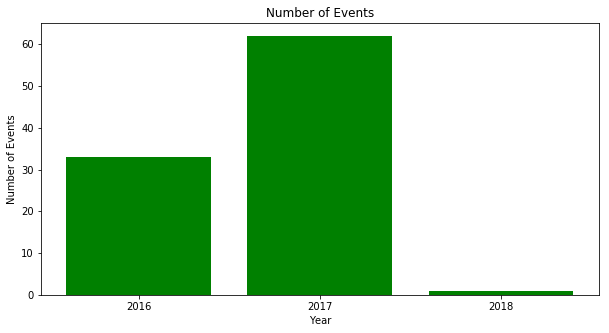

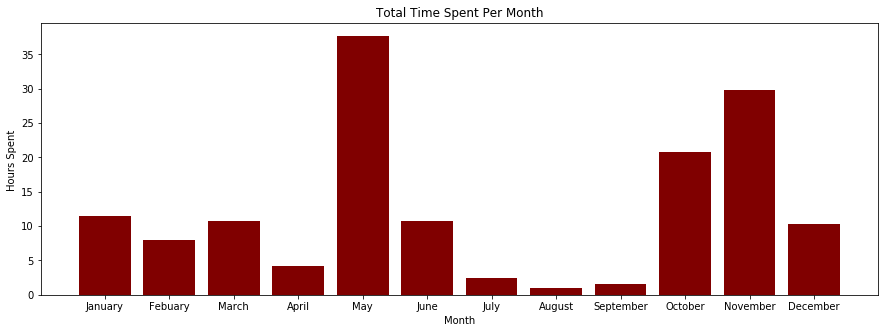

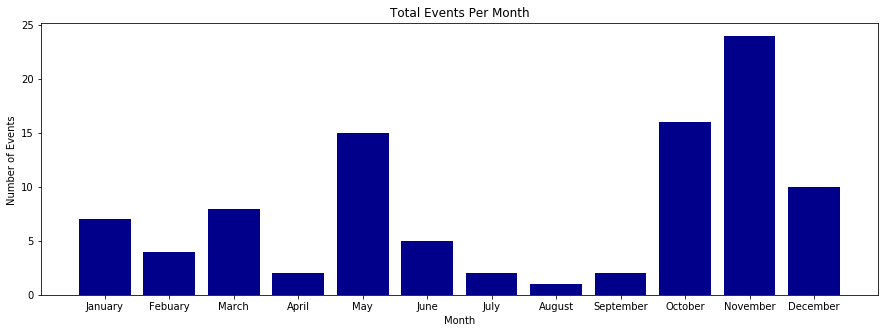

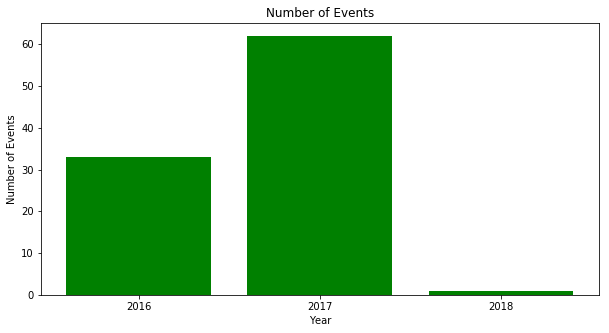

In [288]:
calendar_file = 'shsher@uw.edu.ics'
allday= False
cal_df = _process_calendar(calendar_file)
cal_df.head()
cal_df['minutes'] = cal_df['duration']/60
cal_df['hours'] = cal_df['duration']/3600

#remove birthdays and events longer than 1 day
cal_df = cal_df[~cal_df['event_name'].str.contains('birthday')]
cal_df = cal_df[(cal_df['hours']<24) & (cal_df['hours']>0)]

cal_df['count']=1
cal_min = cal_df.groupby(['event_name'],as_index=False)['event_name','count','minutes'].sum()
cal_min.sort_values('minutes',ascending=False)
cal_month= cal_df.groupby('month',as_index=False)['count'].sum()
cal_month_time = cal_df.groupby('month',as_index=False)['hours'].sum()
cal_year_time = cal_df.groupby('year',as_index=False)['count'].sum()

months = [ "January",
          "Febuary",
          "March",
          "April",
          "May",
          "June",
          "July",
          "August",
          "September",
          "October",
          "November",
          "December"]

plot_tweetDate(cal_month_time, months,'month','hours','Month', 'Hours Spent ', 
               'Total Time Spent Per Month', (15,5) , 'Maroon')

plot_tweetDate(cal_month, months, 'month','count','Month', 'Number of Events ', 
               'Total Events Per Month', (15,5) , 'DarkBlue')

plot_tweetDate(cal_year_time, [2016,2017,2018],'year','count','Year', 
               'Number of Events', 'Number of Events', (10,5) , 'Green')

In [210]:
cal_df.head()

,day,month,year,hour,event_name,duration,minutes,hours,count
13,20,9,2016,14,Unavailable,1800.0,30.0,0.500000,1
15,6,10,2016,13,Assignment Created - Topic Analysis #1: Inform...,3600.0,60.0,1.000000,1
19,17,10,2016,11,"Shrawan, you just booked to participate in the...",1800.0,30.0,0.500000,1
20,17,10,2016,12,Workshop RSVP Confirmation,3000.0,50.0,0.833333,1
21,19,10,2016,12,EVENT: Town Hall meetings for MSIM 1st year st...,3600.0,60.0,1.000000,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x111950860>]], dtype=object)

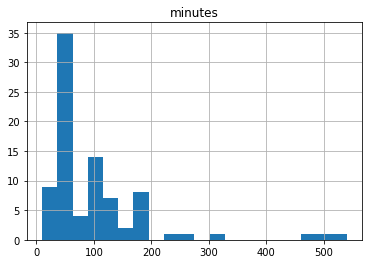

In [211]:
cal_min.hist(column='minutes',bins=20)

In [230]:
cal_month

,month,count
0,1,7
1,2,4
2,3,8
3,4,2
4,5,15
5,6,5
6,7,2
7,8,1
8,9,2
9,10,16


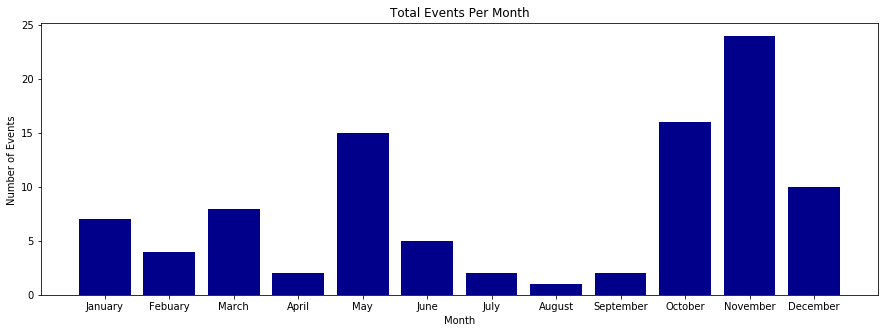

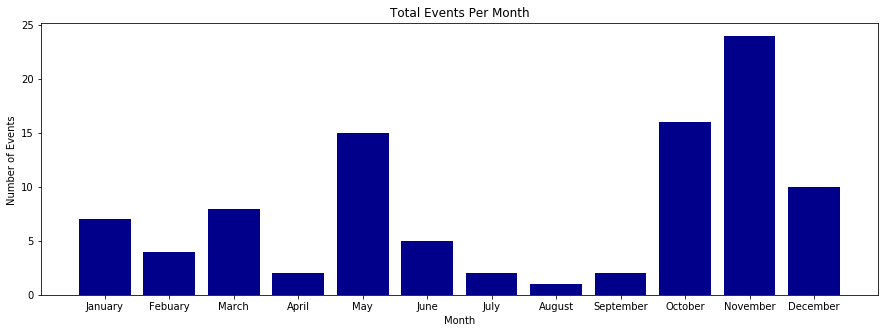

In [245]:
cal_month_time

,month,hours
0,1,11.500000
1,2,8.000000
2,3,10.750000
3,4,4.250000
4,5,37.683333
5,6,10.750000
6,7,2.500000
7,8,1.000000
8,9,1.500000
9,10,20.833333


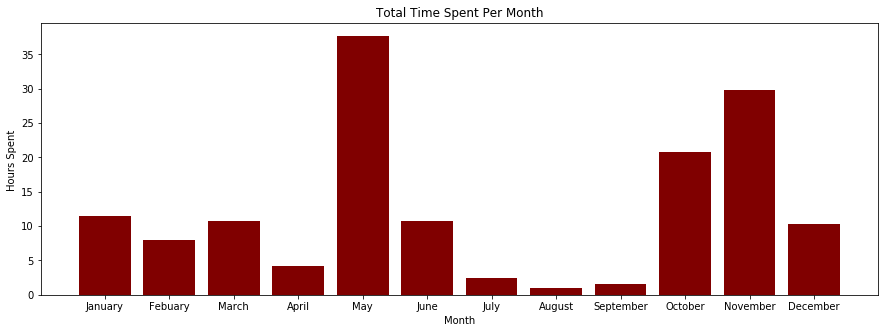

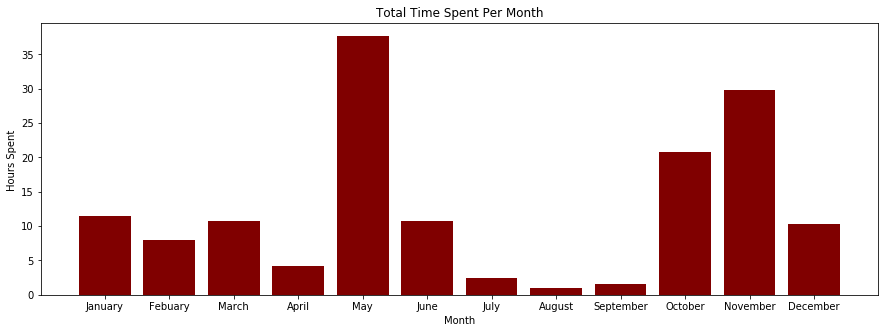

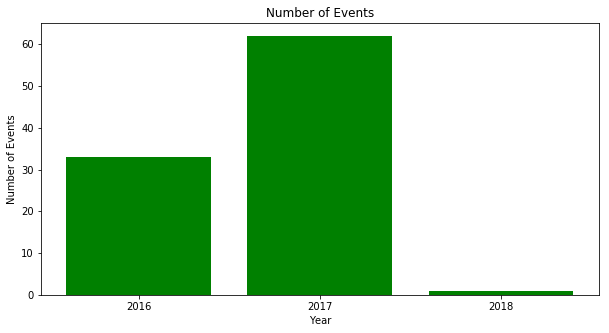

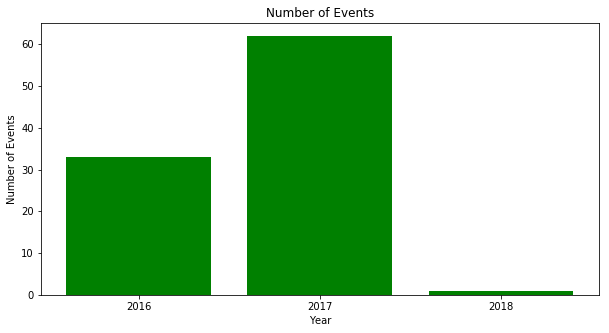